# Gradients without backpropagation

Here I'm testing their approach using a simple regression model $h(\theta,X) = \theta_0 + \theta_1x_0 + \theta_2x_1$ under the MSE loss.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:27<00:00,  3.60it/s]


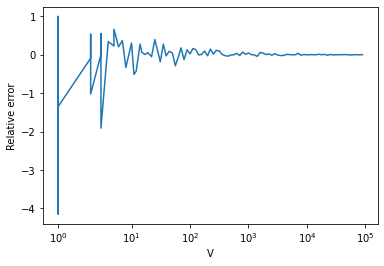

In [23]:
# Simple script that runs my forward gradient

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def hypothesis(X, theta):
    """
    h = theta_1@x + theta_0
    """
    return theta[0] + X@theta[1:]


def mse_loss(X, y, theta): 
    """
    MSE loss: ((h(x)-y)**2)/2n
    """   
    return np.mean((hypothesis(X, theta) - y)**2) / 2


def mse_true_derivative(X, y, theta):
    """
    MSE derivative: [((h(x)-y))]
    """   
    
    d_theta_0 = np.mean(hypothesis(X, theta) - y)
    d_theta_N = X.T@(hypothesis(X, theta) - y) / len(X)
    return np.concatenate(([d_theta_0], d_theta_N))
    

def mse_gaussian_noise_derivative(X,y,theta, h=1e-10, n_v=100000):
    
    estimated_derivatives = []

    V = np.random.normal(0,1, n_v) # ~N(0,1)
    h_V = h*V    

    # Estimating the partial derivative for each theta: https://en.wikipedia.org/wiki/Partial_derivative
    f_theta_x = mse_loss(X, y, theta)
    for i,t in enumerate(theta):


        # | t_0, t_1+h*v_0, t_2
        # | t_0, t_1+h*v_1, t_2
        # | t_0, t_1+h*v_n, t_2
        thetas= np.tile(theta, n_v).reshape(n_v,theta.shape[0])
        thetas[:, i] += h_V

        
        d_theta_i = [ ((mse_loss(X, y, t) - f_theta_x)/h)*v  for v,t in zip(V,thetas)] # Definicao de derivada        
        d_theta_i = np.mean(d_theta_i) # averaging

        estimated_derivatives.append(d_theta_i)
        

    return estimated_derivatives        


np.random.seed(0)
X = np.random.rand(10,2)
y = np.random.rand(10)
theta = np.array([1,0.5,0.2])


rel_err_fg_gaussian = []
rel_err_fg = []
n_pts = []

true_derivative = np.linalg.norm(mse_true_derivative(X,y,theta))
for i in tqdm(range(100)):    
    n_v = int(10**(i/20))
    n_pts.append(n_v)
    est_derivative = np.linalg.norm(mse_gaussian_noise_derivative(X,y,theta, n_v=n_v))
    rel_err_fg_gaussian.append((true_derivative-est_derivative)/true_derivative)
    
    
plt.figure()
plt.plot(n_pts, rel_err_fg_gaussian)
plt.xlabel("V")
plt.ylabel("Relative error")
plt.xscale('symlog')
plt.show()
